In [1]:
import maboss
import numpy
import matplotlib.pyplot as plt
import os

In [5]:
#path_parent = os.path.dirname(os.getcwd())
#local = os.chdir(path_parent)
bnd = 'ICD_latest.bnd'
cfg = 'ICD_latest.cfg'

In [6]:
#print(path_parent)

In [7]:
upp = 'ICD_latest.upp'

In [8]:
model = maboss.load(bnd,cfg)

In [9]:
model.print_bnd()

Node Tumor {


	rate_up = 0.0;
	rate_down = 0.0;
}
Node ChemoT {


	rate_up = 0.0;
	rate_down = $degChemo;
}

Node anti_CTLA4 {


	rate_up = 0.0;
	rate_down = 0.0;
}

Node anti_PD1 {


	rate_up = 0.0;
	rate_down = 0.0;
}

Node DyingTumor {


	rate_up = (Tumor & ChemoT) ? $effectChemo : 0.0 ;
	rate_down = 0.0 ;
}

Node cDC1 {


	rate_up = 0.0;
	rate_down = 0.0;
}

Node cDC2 {


	rate_up = 0.0;
	rate_down = 0.0;
}

Node moDC {


	rate_up = 0.0;
	rate_down = 0.0;
}

Node pDC {


	rate_up = 0.0;
	rate_down = 0.0;
}

Node CD4 {


	rate_up = 0.0;
	rate_down = 0.0;
}

Node CD8 {


	rate_up = 0.0;
	rate_down = 0.0;
}

Node a_cDC1 {

	logic = (cDC1 &  P2X7R);
	rate_up = @logic ? $u_a_cDC1 : 0.0;
	rate_down = 0.0;
}

Node a_cDC2 {

	logic = (cDC2 &  P2X7R);
	rate_up = @logic ? $u_a_cDC2 : 0.0;
	rate_down = 0.0;
}

Node CD4_Act {

	logic = (( IL2R | IL4R | (CD28 & TCR_II)) & CD4);
	rate_up = @logic ? $u_CD4_Act : 0.0;
	rate_down = @logic ? 0.0 : 0.0;
}

Node P2Y2R {

	logic = (cDC1 | cDC2);
	rate

In [10]:
model_pop = maboss.UpdatePopulation(model,upp)

In [22]:
model_pop.setStepNumber(100)

In [23]:
res = model_pop.run()

In [24]:
table = res.get_nodes_stepwise_probability_distribution(model_pop.node_list)

In [25]:
table

,PopRatio,SNAP23,IL4,IL10,ICOS,eIF2a,TGFbR,IL2R,NFkB,TIGIT_L,TRAFs,Division,anti_PD1,ICOS_L,CALR,BAK,a_cDC2,IL12R,CD28,preCTL,FPR1,IFN1R,IL17,SERCA_Ca2,TNFRs_L,HMGB1,LRP1,P2X7R,cDC1,PP1_GADD34,IL6R,PLCG,IL6,Treg,PP2A,LAG3,IFNgR,TCR_II,Proliferation_Survival,TLR4,STAT4,PERK,CD4,GRB2,CASP8,CD8,LAG3_L,VAV,FOXP3,SMAD7,SHIP,cDC2,SHP,CD226,MHC_II,VAMP1,PKC_teta,a_cDC1,TIM3,CK2,ANXA1,BAX,IL1B,CD4_Act,TRAIL,YY1,IFNg,PI3K_AKT,NFAT,TIM3_L,CTL,IL27R,TIGIT,Death,moDC,AP1,IL4R,MHC_I,LCK_FYN,TCR_I,CXCL10,Tumor,LAT_complex,Perforin,Th17,IFN1,actin,Th2,STAT1,pDC,IL17R,IL27,CTLA4,STAT3,TNFRs,TGFb,P2Y2R,ChemoT,iNOS,BAP31,MAPKs,translocation,PD1,IL2,Tbet,IL1BR,PTEN,ROS,NFIL3,PD_L1,CXCR3,GSK3,IL10R,Th1,Ca_NFAT,SMAD2_3,anti_CTLA4,MAF,PRDM1,ATP,IL12,FOXO1,DyingTumor,CD80
0,1.000000,0.000000,0.0,0.000000,0.083469,0.051195,0.000000,0.0,0.017017,0.999978,0.014522,0.0,0.999978,0.999978,0.000000,0.000222,0.0000,0.0000,0.0,0.0,0.0000,0.000000,0.0,0.213980,0.999978,0.002747,0.0000,0.0000,0.024805,0.005273,0.000000,0.0,0.003262,0.0,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.0000,0.061858,0.050198,0.0,0.001267,0.050094,0.0,0.229373,0.246942,0.454587,0.016045,0.024805,0.058511,0.571235,0.0000,0.000000,0.066193,0.0000,0.106917,0.550298,0.048815,0.000022,0.00000,0.0,0.005781,0.017690,0.004032,0.008501,0.003180,0.999978,0.0,0.024996,0.072667,0.0000,0.024805,0.017926,0.0,0.000000,0.050347,0.0,0.000000,0.874881,0.0,0.0,0.0,0.000000,0.000000,0.0,0.014426,0.024805,0.0,0.00000,0.0,0.013415,0.075542,0.133671,0.000000,0.864003,0.209094,0.212134,0.077784,0.000000,0.100106,0.0,0.252258,0.000000,0.280650,0.214178,0.004853,0.874881,0.000000,0.597670,0.024995,0.0,0.018294,0.000000,0.999978,0.004973,0.005655,0.044367,0.000000,0.601496,0.535897,0.000000
1,0.999978,0.000000,0.0,0.000000,0.322496,0.210663,0.000829,0.0,0.115459,0.999974,0.093818,0.0,0.999974,0.999974,0.000000,0.006904,0.0000,0.0000,0.0,0.0,0.0000,0.000000,0.0,0.493431,0.999974,0.016879,0.0000,0.0000,0.024904,0.053207,0.000000,0.0,0.006197,0.0,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.0000,0.250961,0.050304,0.0,0.023307,0.050004,0.0,0.402634,0.482495,0.390340,0.113029,0.024904,0.078550,0.610553,0.0000,0.000000,0.206615,0.0000,0.110326,0.725203,0.143134,0.005988,0.00000,0.0,0.072789,0.131189,0.006635,0.067296,0.018505,0.999974,0.0,0.024805,0.255799,0.0000,0.024904,0.128399,0.0,0.000000,0.061750,0.0,0.000000,0.874762,0.0,0.0,0.0,0.000000,0.000000,0.0,0.020722,0.024904,0.0,0.00000,0.0,0.020339,0.246298,0.247714,0.000200,0.852174,0.481267,0.472213,0.313814,0.000100,0.128793,0.0,0.170597,0.000000,0.212315,0.478853,0.012046,0.874762,0.000000,0.766345,0.025104,0.0,0.137928,0.000100,0.999974,0.013306,0.013569,0.139873,0.000000,0.761891,0.740731,0.000000
2,0.999952,0.000000,0.0,0.000000,0.568872,0.395019,0.004347,0.0,0.223476,0.999983,0.170469,0.0,0.999983,0.999983,0.000000,0.039858,0.0000,0.0000,0.0,0.0,0.0000,0.000000,0.0,0.657638,0.999983,0.044349,0.0000,0.0000,0.025198,0.175374,0.000000,0.0,0.008124,0.0,0.0,0.0000,0.000100,0.0,0.0,0.000000,0.0000,0.455241,0.050298,0.0,0.100762,0.050111,0.0,0.405177,0.574160,0.312344,0.254956,0.025198,0.124716,0.520236,0.0000,0.000000,0.277989,0.0000,0.112182,0.755116,0.238829,0.039887,0.00000,0.0,0.220433,0.311484,0.009912,0.180712,0.062858,0.999983,0.0,0.024598,0.401764,0.0000,0.025198,0.313083,0.0,0.000000,0.064045,0.0,0.000000,0.874376,0.0,0.0,0.0,0.000000,0.000498,0.0,0.023269,0.025198,0.0,0.00000,0.0,0.022937,0.316729,0.352527,0.000437,0.840094,0.651187,0.586405,0.529256,0.003426,0.185547,0.0,0.167739,0.000000,0.186308,0.651936,0.018127,0.874376,0.000000,0.742245,0.025798,0.0,0.341696,0.000755,0.999983,0.019173,0.019291,0.233861,0.000000,0.734765,0.815931,0.000000
3,0.999935,0.000647,0.0,0.000000,0.736681,0.551496,0.007359,0.0,0.288140,0.999991,0.177706,0.0,0.999991,0.999991,0.000000,0.119717,0.0002,0.0000,0.0,0.0,0.0000,0.000000,0.0,0.738365,0.999991,0.081166,0.0000,0.0002,0.025900,0.332086,0.000300,0.0,0.010209,0.0,0.0,0.0000,0.000200,0.0,0.0,0.000000,0.0000,0.606694,0.050602,0.0,0.2

(0.0, 0.1)

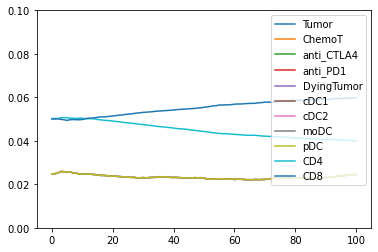

In [26]:
for i in range(11):
    plt.plot(table['PopRatio']*table[model_pop.node_list[i]],label=model_pop.node_list[i])
plt.legend()
plt.ylim(bottom=0,top=0.1)